### 트위터 유저와 mbti
- datasets: mbti_label.csv, user_info.csv
- machine learning method: supervised learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
user_path = './data/user_info.csv'
mbti_path = './data/mbti_labels.csv'

In [3]:
user_df = pd.read_csv(user_path)
mbti_df = pd.read_csv(mbti_path)

In [4]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8328 entries, 0 to 8327
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            8328 non-null   int64  
 1   id_str                        8328 non-null   int64  
 2   name                          8327 non-null   object 
 3   screen_name                   8328 non-null   object 
 4   location                      7129 non-null   object 
 5   description                   8209 non-null   object 
 6   verified                      8328 non-null   bool   
 7   followers_count               8328 non-null   int64  
 8   friends_count                 8328 non-null   int64  
 9   listed_count                  8328 non-null   int64  
 10  favourites_count              8328 non-null   int64  
 11  statuses_count                8328 non-null   int64  
 12  number_of_quoted_statuses     8328 non-null   int64  
 13  num

In [5]:
user_df.head()

,id,id_str,name,screen_name,location,description,verified,followers_count,friends_count,listed_count,...,total_mentions_count,total_media_count,number_of_tweets_scraped,average_tweet_length,average_retweet_count,average_favorite_count,average_hashtag_count,average_url_count,average_mentions_count,average_media_count
0,160881623,160881623,Biam 🍃 32 Days AC 🌴🌹,_AiBiam,Hateno Village,🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...,False,1904,782,67,...,139,114,200.0,11.785000,3003.580000,0.980000,0.250000,0.185000,0.695000,0.570000
1,28968838,28968838,pao,paoacflores,Mandaluyong/StaCruz Laguna PH,right brained lefty. infp. hufflepuff. collect...,False,14135,1338,47,...,156,34,200.0,16.150000,3718.745000,1.695000,0.410000,0.215000,0.780000,0.170000
2,2325006565,2325006565,pengu🌻❤️🍓@青鳥王国,PenguPooh,PengUstine CCTV,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,False,1223,604,31,...,170,40,199.0,9.668342,3722.211055,0.824121,0.356784,0.195980,0.854271,0.201005
3,907848145,907848145,lynn bean,sukaihan,Singapore,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",False,8512,312,147,...,174,77,192.0,14.718750,10028.718750,1.526042,0.401042,0.130208,0.906250,0.401042
4,1330237585,1330237585,Sei💫,nemuiryuu,NaN,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,False,1805,340,69,...,127,99,200.0,7.655000,827.370000,2.190000,0.080000,0.055000,0.635000,0.495000


In [6]:
user_df.value_counts()

id                   id_str               name                      screen_name    location                        description                                                                                                                                verified  followers_count  friends_count  listed_count  favourites_count  statuses_count  number_of_quoted_statuses  number_of_retweeted_statuses  total_retweet_count  total_favorite_count  total_hashtag_count  total_url_count  total_mentions_count  total_media_count  number_of_tweets_scraped  average_tweet_length  average_retweet_count  average_favorite_count  average_hashtag_count  average_url_count  average_mentions_count  average_media_count
295                  295                  Josh Kopelman             joshk          Philly                          VC. Father. Geek. INTJ                                                                                                                     True      137471           4180           

In [7]:
user_df.isna().sum()

id                                 0
id_str                             0
name                               1
screen_name                        0
location                        1199
description                      119
verified                           0
followers_count                    0
friends_count                      0
listed_count                       0
favourites_count                   0
statuses_count                     0
number_of_quoted_statuses          0
number_of_retweeted_statuses       0
total_retweet_count                0
total_favorite_count               0
total_hashtag_count                0
total_url_count                    0
total_mentions_count               0
total_media_count                  0
number_of_tweets_scraped           0
average_tweet_length               0
average_retweet_count              0
average_favorite_count             0
average_hashtag_count              0
average_url_count                  0
average_mentions_count             0
a

In [8]:
mbti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8328 entries, 0 to 8327
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                8328 non-null   int64 
 1   mbti_personality  8328 non-null   object
dtypes: int64(1), object(1)
memory usage: 130.2+ KB


In [9]:
mbti_df.head()

,id,mbti_personality
0,160881623,infp
1,28968838,infp
2,2325006565,infp
3,907848145,infp
4,1330237585,infp


In [10]:
mbti_df.isna().sum()

id                  0
mbti_personality    0
dtype: int64

In [11]:
mbti_df['mbti_personality'].value_counts()

mbti_personality
infj    917
intj    905
enfp    900
infp    899
enfj    723
intp    712
entj    677
entp    586
isfj    420
istj    342
esfj    236
isfp    232
estj    221
istp    209
esfp    202
estp    147
Name: count, dtype: int64

In [12]:
user_df.columns

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'description',
       'verified', 'followers_count', 'friends_count', 'listed_count',
       'favourites_count', 'statuses_count', 'number_of_quoted_statuses',
       'number_of_retweeted_statuses', 'total_retweet_count',
       'total_favorite_count', 'total_hashtag_count', 'total_url_count',
       'total_mentions_count', 'total_media_count', 'number_of_tweets_scraped',
       'average_tweet_length', 'average_retweet_count',
       'average_favorite_count', 'average_hashtag_count', 'average_url_count',
       'average_mentions_count', 'average_media_count'],
      dtype='object')

In [13]:
user_df['id']

0                160881623
1                 28968838
2               2325006565
3                907848145
4               1330237585
               ...        
8323             489644768
8324            3061139834
8325             329077476
8326    781835161394614272
8327            2840408812
Name: id, Length: 8328, dtype: int64

In [14]:
mbti_df['id']

0                160881623
1                 28968838
2               2325006565
3                907848145
4               1330237585
               ...        
8323             489644768
8324            3061139834
8325             329077476
8326    781835161394614272
8327            2840408812
Name: id, Length: 8328, dtype: int64

In [15]:
feature_df = pd.read_csv('./data/mbti/feature.csv', encoding='utf-8')
feature_df = feature_df.drop(columns=['Unnamed: 0'])
label_sr = pd.read_csv('./data/mbti/target.csv', encoding='utf-8')
label_sr = label_sr.drop(columns=['Unnamed: 0'])
label_sr = label_sr['mbti_personality']

In [16]:
feature_df.head()

,total_retweet_count,total_favorite_count,total_hashtag_count,total_url_count,total_mentions_count,total_media_count,number_of_tweets_scraped
0,600716,196,50,37,139,114,200.0
1,743749,339,82,43,156,34,200.0
2,740720,164,71,39,170,40,199.0
3,1925514,293,77,25,174,77,192.0
4,165474,438,16,11,127,99,200.0


In [17]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8328 entries, 0 to 8327
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_retweet_count       8328 non-null   int64  
 1   total_favorite_count      8328 non-null   int64  
 2   total_hashtag_count       8328 non-null   int64  
 3   total_url_count           8328 non-null   int64  
 4   total_mentions_count      8328 non-null   int64  
 5   total_media_count         8328 non-null   int64  
 6   number_of_tweets_scraped  8328 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 455.6 KB


In [18]:
feature_df['number_of_tweets_scraped'].unique()

array([200., 199., 192., 197., 196., 198., 195., 193., 189., 190., 191.,
       194., 188., 181., 172., 182., 185., 176., 162., 186., 166., 187.,
       155., 168., 104., 141., 178., 151., 147., 142., 130., 125., 123.,
       171., 115., 100., 170., 183., 184., 164.,  57., 143., 180., 139.,
        96.,  70.,  68., 144., 159., 113.,  81.,  58.,  54., 167.,  27.,
       160., 179., 148., 110.,  89.,  69.,  82.,  65.,  64.,  63., 161.,
       174., 175., 149., 137., 134., 106.,  98.,  55., 136.,  41., 140.,
       156., 153., 152., 127.,  92.,  97.,  84.,  75.,  60., 132.,  46.,
        80.,  28., 173., 157., 124., 119., 109., 105., 101.,  77.,  72.,
        59.,  52.,  53.,  22.,  24., 138., 118., 108.,  95.,  44.,  85.,
        79.,  67.,  50.,  86., 165., 131., 116.,  99.,  88.,  78.,  51.,
       129., 103.,  36., 150.,  83.,  94., 158., 177.,  35., 112.,  93.,
        71.,  43.,  66.,  47.,  31.,  19.,  42., 145., 146.,  11., 163.,
       114.,  91., 122., 117.,  76., 107.,  74.])

In [19]:
feature_df = feature_df.astype({'number_of_tweets_scraped':'int64'})
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8328 entries, 0 to 8327
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   total_retweet_count       8328 non-null   int64
 1   total_favorite_count      8328 non-null   int64
 2   total_hashtag_count       8328 non-null   int64
 3   total_url_count           8328 non-null   int64
 4   total_mentions_count      8328 non-null   int64
 5   total_media_count         8328 non-null   int64
 6   number_of_tweets_scraped  8328 non-null   int64
dtypes: int64(7)
memory usage: 455.6 KB


<Figure size 5e+07x5e+07 with 0 Axes>

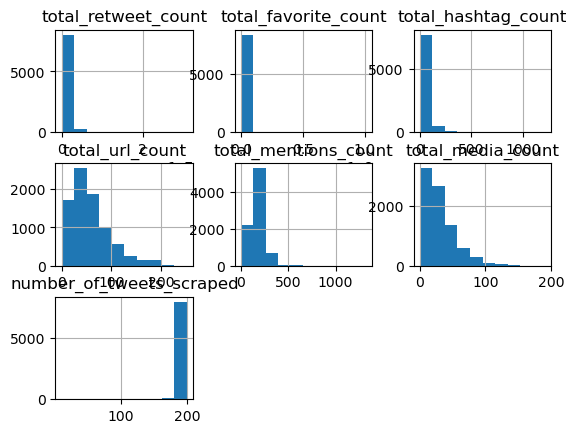

In [20]:
plt.figure(figsize=(500000, 500000))
feature_df.hist()
plt.show()

In [21]:
label_sr.head()

0    infp
1    infp
2    infp
3    infp
4    infp
Name: mbti_personality, dtype: object

In [22]:
# 상관관계를 보기 위한
data_df = feature_df.copy()
data_df['mbti'] = label_sr

names = data_df['mbti'].unique().tolist() 
mapping = {name:idx for idx, name in enumerate(names)}  # dict comprehension
data_df['mbti_code'] = data_df['mbti'].map(mapping)

data_df.head()

,total_retweet_count,total_favorite_count,total_hashtag_count,total_url_count,total_mentions_count,total_media_count,number_of_tweets_scraped,mbti,mbti_code
0,600716,196,50,37,139,114,200,infp,0
1,743749,339,82,43,156,34,200,infp,0
2,740720,164,71,39,170,40,199,infp,0
3,1925514,293,77,25,174,77,192,infp,0
4,165474,438,16,11,127,99,200,infp,0


In [23]:
import seaborn as sns

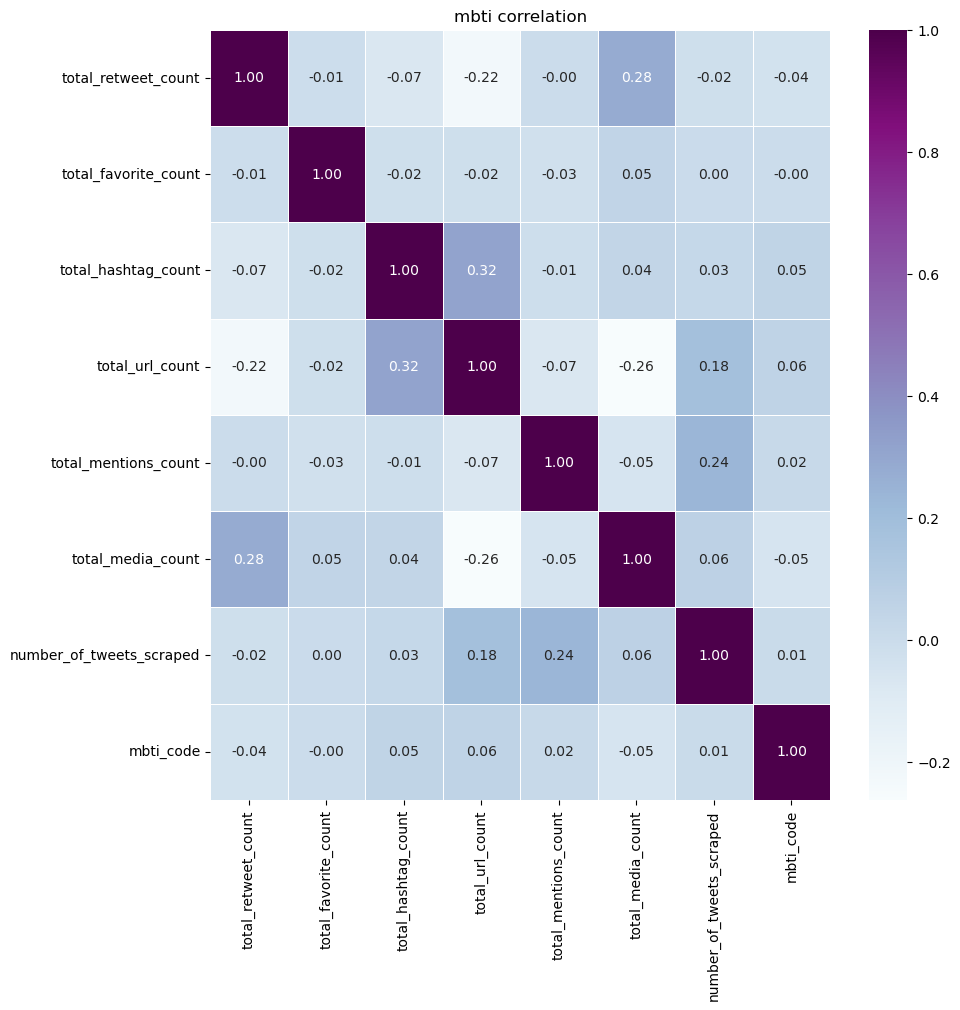

In [24]:
corr_mbti = data_df.corr(numeric_only=True)

plt.figure(figsize=(10,10))
sns.heatmap(corr_mbti, annot=True, cmap='BuPu', fmt='.2f', linewidths=0.5)
plt.title('mbti correlation')
plt.show()

In [25]:
user_df.columns

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'description',
       'verified', 'followers_count', 'friends_count', 'listed_count',
       'favourites_count', 'statuses_count', 'number_of_quoted_statuses',
       'number_of_retweeted_statuses', 'total_retweet_count',
       'total_favorite_count', 'total_hashtag_count', 'total_url_count',
       'total_mentions_count', 'total_media_count', 'number_of_tweets_scraped',
       'average_tweet_length', 'average_retweet_count',
       'average_favorite_count', 'average_hashtag_count', 'average_url_count',
       'average_mentions_count', 'average_media_count'],
      dtype='object')

In [26]:
data_df2 = user_df.iloc[:, 7:]
data_df2['mbti'] = label_sr

names = data_df2['mbti'].unique().tolist() 
mapping = {name:idx for idx, name in enumerate(names)}  # dict comprehension
data_df2['mbti_code'] = data_df2['mbti'].map(mapping)

data_df2.head()

,followers_count,friends_count,listed_count,favourites_count,statuses_count,number_of_quoted_statuses,number_of_retweeted_statuses,total_retweet_count,total_favorite_count,total_hashtag_count,...,number_of_tweets_scraped,average_tweet_length,average_retweet_count,average_favorite_count,average_hashtag_count,average_url_count,average_mentions_count,average_media_count,mbti,mbti_code
0,1904,782,67,133836,410600,14,103,600716,196,50,...,200.0,11.785000,3003.580000,0.980000,0.250000,0.185000,0.695000,0.570000,infp,0
1,14135,1338,47,103794,358901,23,113,743749,339,82,...,200.0,16.150000,3718.745000,1.695000,0.410000,0.215000,0.780000,0.170000,infp,0
2,1223,604,31,178178,312384,17,93,740720,164,71,...,199.0,9.668342,3722.211055,0.824121,0.356784,0.195980,0.854271,0.201005,infp,0
3,8512,312,147,40136,282995,24,135,1925514,293,77,...,192.0,14.718750,10028.718750,1.526042,0.401042,0.130208,0.906250,0.401042,infp,0
4,1805,340,69,151521,244181,2,68,165474,438,16,...,200.0,7.655000,827.370000,2.190000,0.080000,0.055000,0.635000,0.495000,infp,0


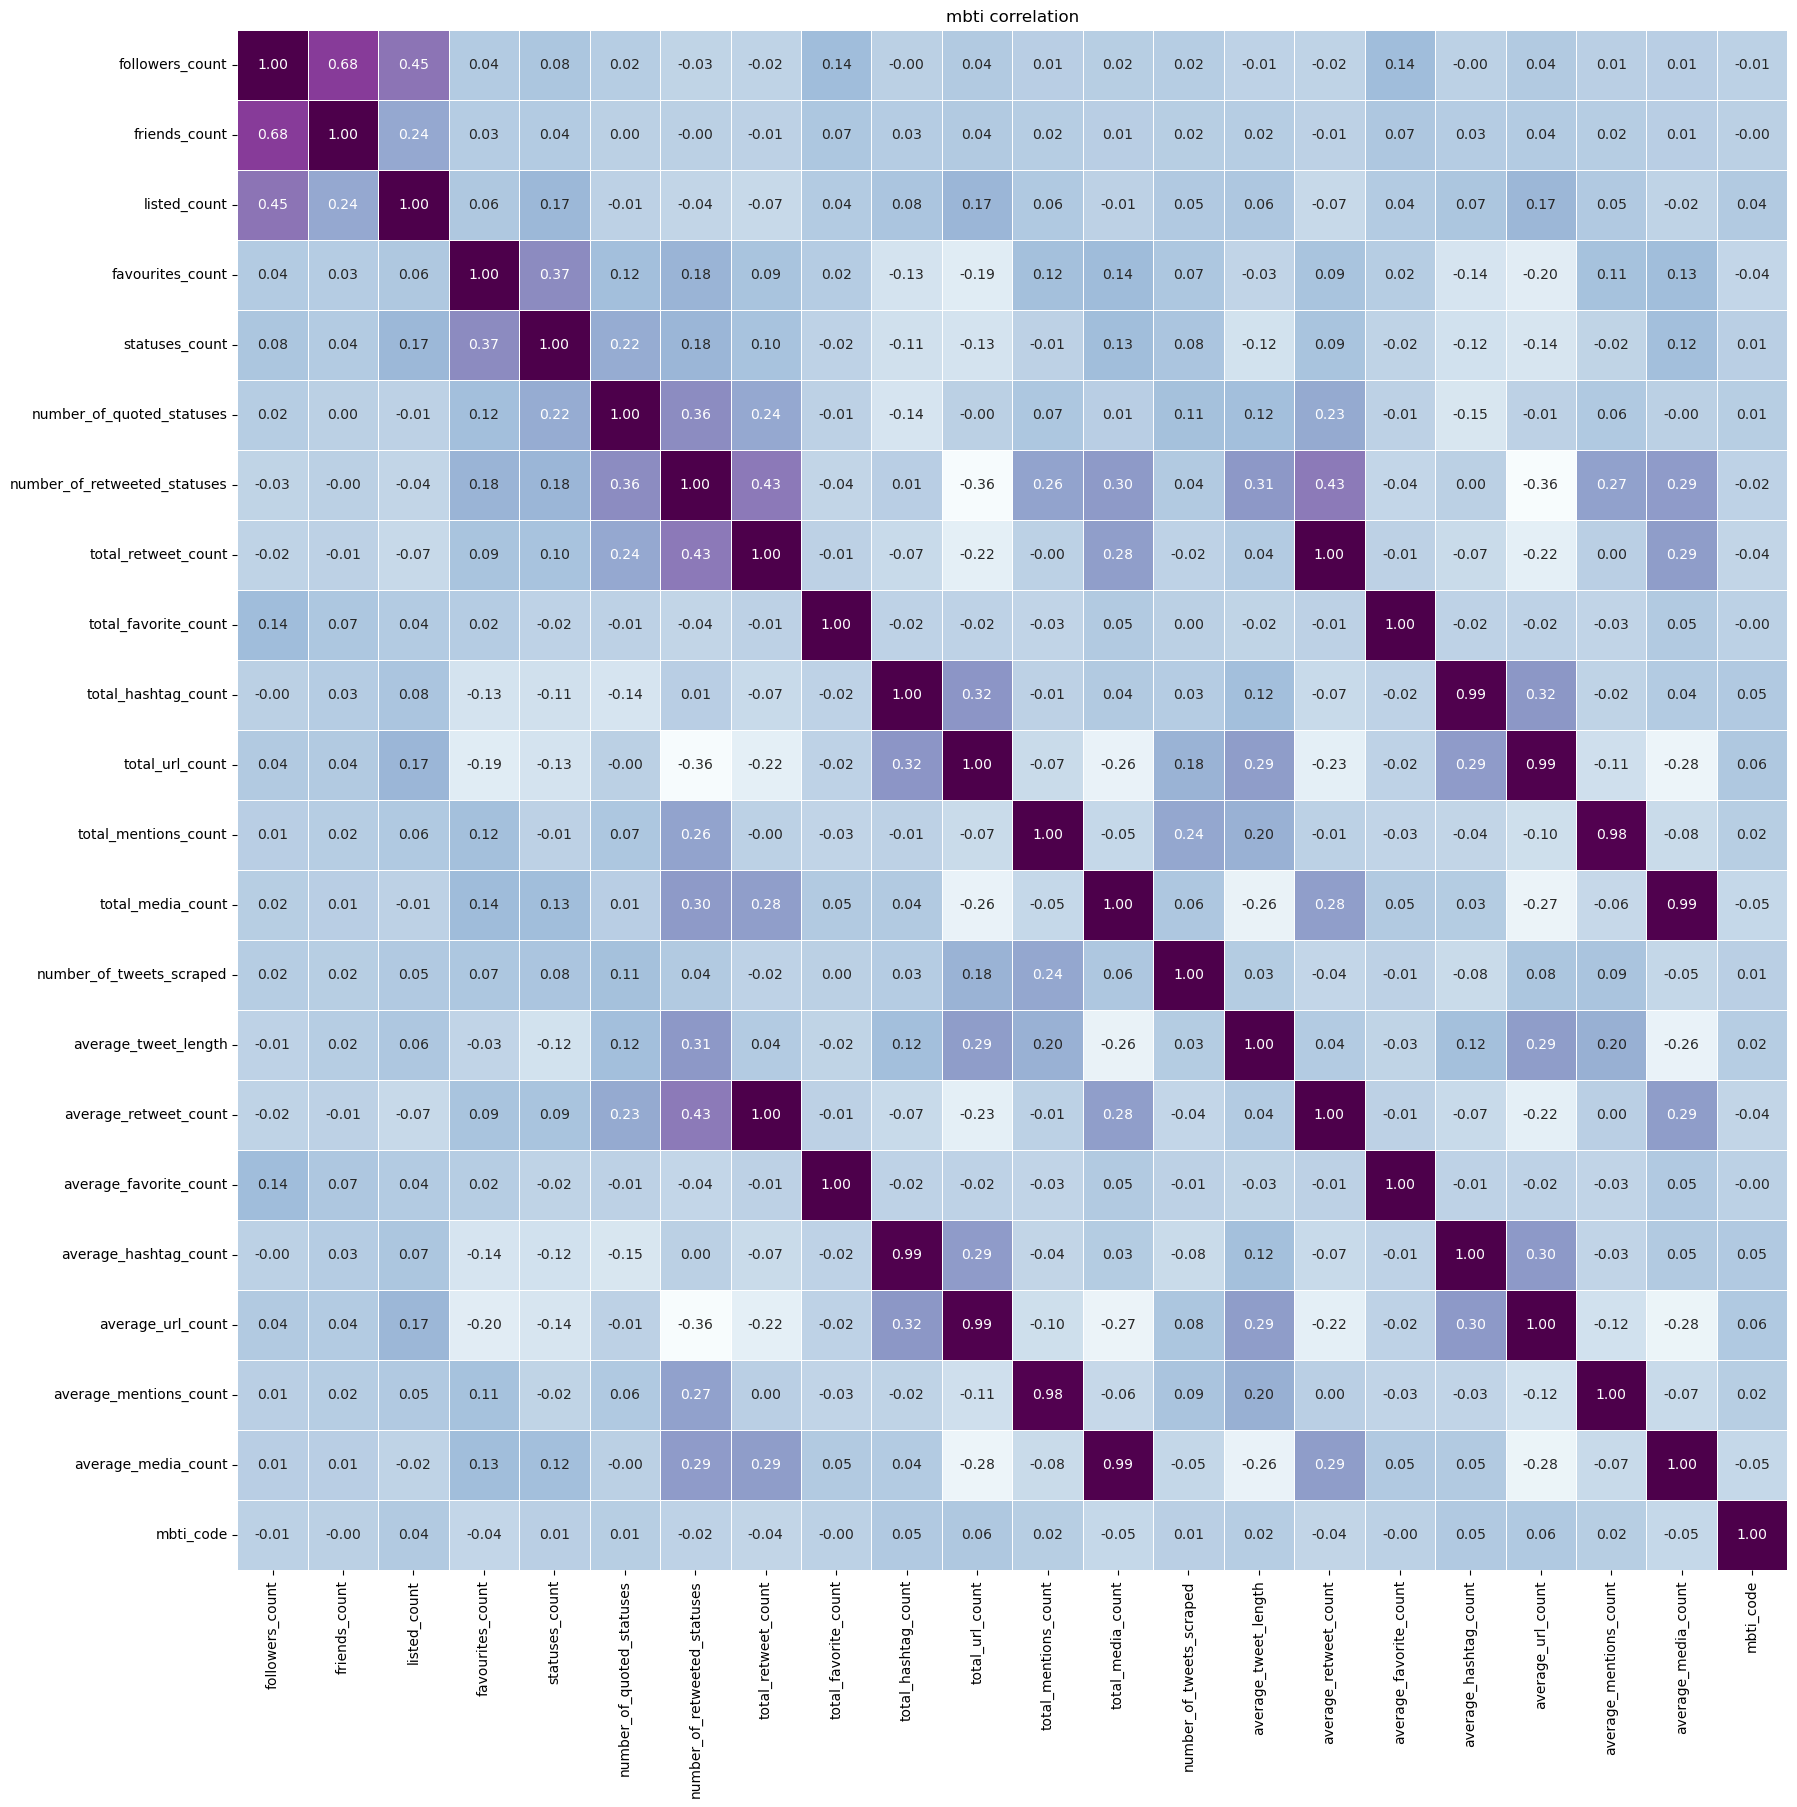

In [27]:
corr_mbti2 = data_df2.corr(numeric_only=True)

plt.figure(figsize=(20,20))
sns.heatmap(corr_mbti2, annot=True, cmap='BuPu', fmt='.2f', linewidths=0.5, cbar=False)
plt.title('mbti correlation')
plt.show()

- 상관관계가 높은 칼럼이 없음....

- 분류모델을 뭘 쓸까 고민하다가... 한번쯤 해보고 싶었던 Support Vector Machine으로 Classification을 해보기로 결정
- feature는 상관관계가 높은 것이 없어서 다른 조원들과 동일하게 total_~~ 를 사용.
- label_sr은 data_df의 'mbti_code'를 사용
- 
- 
- goal: mbti classification
- learning method: supervised learning, classification
- learning algorithm: support vector machine
- feature: feature.csv
- label: label encoded target.csv
- scale: undetermined
- scaler algorithm: standard, quantile

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [29]:
label_sr2 = data_df['mbti_code']

# tarin : test = 8 : 2
# random_state: 38
# stratify: label_sr2

X_train, X_test, y_train, y_test = train_test_split(feature_df, label_sr2, test_size=0.2, stratify=label_sr2, random_state=38)

print(f"X train: {X_train.shape}, {X_train.ndim}D")
print(f"y train: {y_train.shape}, {y_train.ndim}D\n")
print(f"X test: {X_test.shape}, {X_test.ndim}D")
print(f"y test: {y_test.shape}, {y_test.ndim}D\n")
print(f"train test ratio: {len(X_train)/len(feature_df)*100:.2f} %, {len(X_test)/len(feature_df)*100:.2f} %")

X train: (6662, 7), 2D
y train: (6662,), 1D

X test: (1666, 7), 2D
y test: (1666,), 1D

train test ratio: 80.00 %, 20.00 %


In [30]:
# model insrance
# default params use
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [31]:
# model attribute
# svm_coef = svm_model.coef_    # model kernel=linear
svm_dual_coef = svm_model.dual_coef_
svm_bais = svm_model.intercept_
svm_sv = svm_model.support_vectors_

print(f"dual coef:\n{svm_dual_coef}")
print(f"bais:\n{svm_bais}")
print(f"support vector:\n{svm_sv}")

dual coef:
[[ 1.  1.  1. ... -1. -1. -1.]
 [ 0.  0.  0. ... -1. -1. -1.]
 [ 0.  0.  1. ... -1. -1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 0.  1.  1. ... -1. -1. -1.]
 [ 0.  1.  0. ... -1. -1. -1.]]
bais:
[ 0.39513522  1.02214671  1.01225247  0.46566066  1.00936308  1.00854187
  1.00310045  0.6958847   0.34778616  0.8933892   0.82000978  0.42762031
  0.82269501  0.98557012  0.96553411  1.00350889  1.00385224  0.53163361
  0.9960872   0.50315209  1.00372439  0.19478233 -0.08335264  0.74833681
  0.28277292  0.26597422  0.66821012  0.72895717  0.43271654  0.42486914
 -0.99971733 -1.04272276 -0.2171386   1.01473675 -1.00563167 -1.00033276
 -0.97831486 -0.4751812  -1.01903408 -1.0129374  -0.8949007  -0.57359937
 -1.00485252 -0.91028884  0.06959802  1.03392457 -0.89698742 -1.00241187
 -0.94651809 -0.66991333 -1.00783682 -0.96894106 -1.00030326 -0.67537188
  0.97251148  0.74398287  1.00630922  0.15941522 -0.49462867  0.81966732
  0.50360597  0.37688187  0.37982257  0.92771848  0.69879411 

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
svm_train_score = svm_model.score(X_train, y_train)
svm_test_score = svm_model.score(X_test, y_test)

svm_pred = svm_model.predict(X_test)

svm_acc = accuracy_score(y_test, svm_pred)
svm_mat = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred, zero_division=0)

In [34]:
print(f"normal svm train score: {svm_train_score*100:.2f} %")
print(f"normal svm test score: {svm_test_score*100:.2f} %\n")

# print(f"normal svm confusion matrix:\n{svm_mat}\n")

print(f"normal svm accuracy: {svm_acc*100:.2f} %")
print(f"normal svm classification report:\n{svm_report}")


normal svm train score: 12.76 %
normal svm test score: 12.36 %

normal svm accuracy: 12.36 %
normal svm classification report:
              precision    recall  f1-score   support

           0       0.11      0.19      0.14       180
           1       0.14      0.19      0.16       180
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00       143
           5       0.00      0.00      0.00       117
           6       0.00      0.00      0.00        42
           7       0.00      0.00      0.00        29
           8       0.13      0.73      0.22       184
           9       0.06      0.02      0.03       145
          10       0.00      0.00      0.00        84
          11       0.00      0.00      0.00        47
          12       0.00      0.00      0.00       181
          13       0.00      0.00      0.00       136
          14       0.00      0.00      0.00        68
        

- mbti 16개를 전부 분류를 하는 것은 무리라고 판단
- 4개로 E/I, N/S, T/F, P/J로 각각 이진 분류를 하는 것을 목표로!!

In [35]:
label_df = pd.read_csv('./data/mbti/target_2.csv', encoding='utf-8')
label_df.head()

,mbti_personality,ie,ns,ft,jp
0,infp,i,n,f,p
1,infp,i,n,f,p
2,infp,i,n,f,p
3,infp,i,n,f,p
4,infp,i,n,f,p


In [36]:
# 상관관계를 보기 위한
data_df = feature_df.copy()
data_df['ei'] = label_df['ie']
data_df['ns'] = label_df['ns']
data_df['tf'] = label_df['ft']
data_df['pj'] = label_df['jp']

for mbti in ['ei', 'ns', 'tf', 'pj']:
    names = data_df[mbti].unique().tolist() 
    mapping = {name:idx for idx, name in enumerate(names)}  # dict comprehension
    data_df[mbti+'_code'] = data_df[mbti].map(mapping)

data_df['ei'].value_counts()

ei
i    4636
e    3692
Name: count, dtype: int64

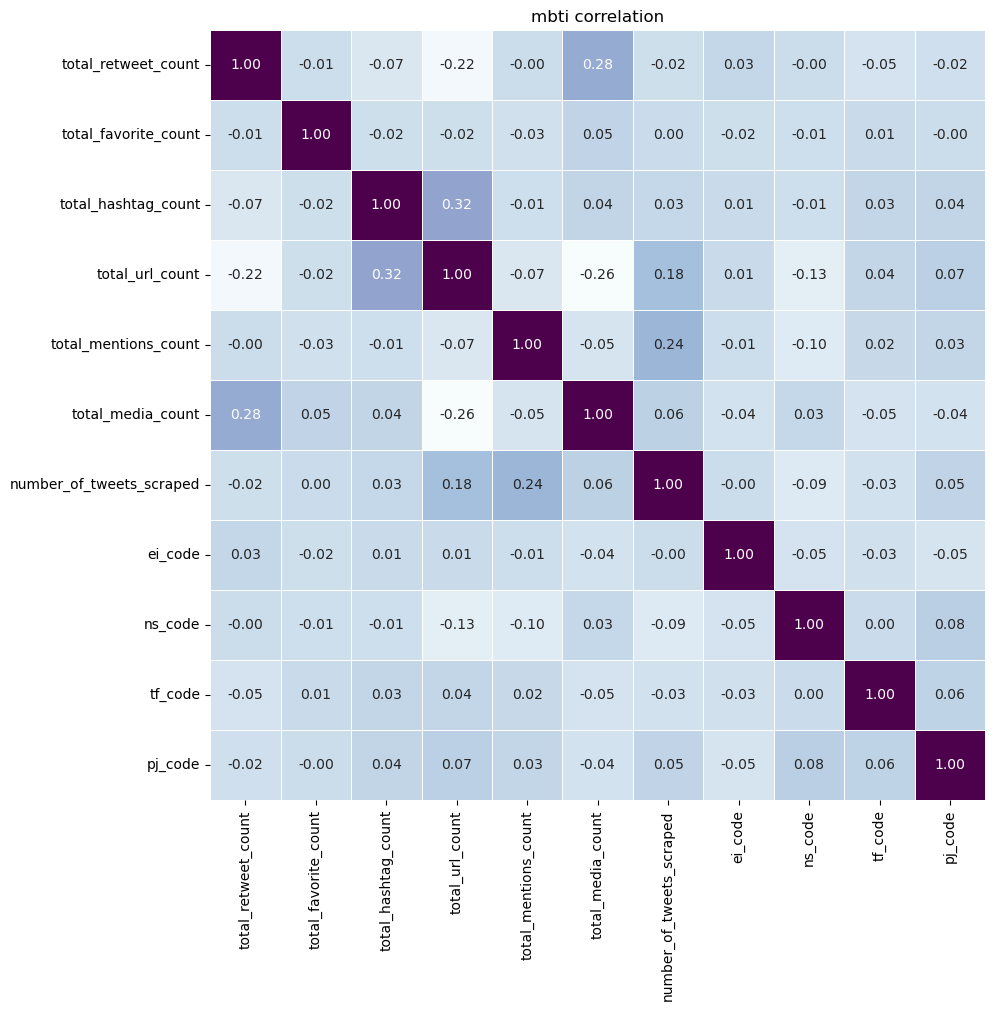

In [37]:
corr_mbti = data_df.corr(numeric_only=True)

plt.figure(figsize=(10,10))
sns.heatmap(corr_mbti, annot=True, cmap='BuPu', fmt='.2f', linewidths=0.5, cbar=False)
plt.title('mbti correlation')
plt.show()

- 여전히 상관관계는 금쪽이였다....

In [54]:
# label_ei = data_df['ei_code']
# label_ns = data_df['ns_code']
# label_tf = data_df['tf_code']
# label_pj = data_df['pj_code']

label_ei = data_df['ei']
label_ns = data_df['ns']
label_tf = data_df['tf']
label_pj = data_df['pj']


# tarin : test = 8 : 2
# random_state: 38
# stratify: label_...

ei_X_train, ei_X_test, ei_y_train, ei_y_test = train_test_split(feature_df, label_ei, test_size=0.2, stratify=label_ei, random_state=38)
ns_X_train, ns_X_test, ns_y_train, ns_y_test = train_test_split(feature_df, label_ns, test_size=0.2, stratify=label_ns, random_state=38)
tf_X_train, tf_X_test, tf_y_train, tf_y_test = train_test_split(feature_df, label_tf, test_size=0.2, stratify=label_tf, random_state=38)
pj_X_train, pj_X_test, pj_y_train, pj_y_test = train_test_split(feature_df, label_pj, test_size=0.2, stratify=label_pj, random_state=38)

print('ei 하나만')
print(f"EI X train: {ei_X_train.shape}, {ei_X_train.ndim}D")
print(f"EI y train: {ei_y_train.shape}, {ei_y_train.ndim}D\n")
print(f"EI X test: {ei_X_test.shape}, {ei_X_test.ndim}D")
print(f"EI y test: {ei_y_test.shape}, {ei_y_test.ndim}D\n")
print(f"EI train test ratio: {len(ei_X_train)/len(feature_df)*100:.2f} %, {len(ei_X_test)/len(feature_df)*100:.2f} %")

ei 하나만
EI X train: (6662, 7), 2D
EI y train: (6662,), 1D

EI X test: (1666, 7), 2D
EI y test: (1666,), 1D

EI train test ratio: 80.00 %, 20.00 %


In [55]:
# model insrance
# default params use
ein_svm_model = SVC()
ein_svm_model.fit(ei_X_train, ei_y_train)

SVC()

In [56]:
# model insrance
# default params use
nsn_svm_model = SVC()
nsn_svm_model.fit(ns_X_train, ns_y_train)

SVC()

In [57]:
# model insrance
# default params use
tfn_svm_model = SVC()
tfn_svm_model.fit(tf_X_train, tf_y_train)

SVC()

In [58]:
# model insrance
# default params use
pjn_svm_model = SVC()
pjn_svm_model.fit(pj_X_train, pj_y_train)

SVC()

In [59]:
# model attribute
# ein_svm_coef = ein_svm_model.coef_    # model kernel=linear
ein_svm_dual_coef = ein_svm_model.dual_coef_
ein_svm_bais = ein_svm_model.intercept_
ein_svm_sv = ein_svm_model.support_vectors_

nsn_svm_dual_coef = nsn_svm_model.dual_coef_
nsn_svm_bais = nsn_svm_model.intercept_
nsn_svm_sv = nsn_svm_model.support_vectors_

tfn_svm_dual_coef = tfn_svm_model.dual_coef_
tfn_svm_bais = tfn_svm_model.intercept_
tfn_svm_sv = tfn_svm_model.support_vectors_

pjn_svm_dual_coef = pjn_svm_model.dual_coef_
pjn_svm_bais = pjn_svm_model.intercept_
pjn_svm_sv = pjn_svm_model.support_vectors_

print(f"ei dual coef:\n{ein_svm_dual_coef}")
print(f"ei bais:\n{ein_svm_bais}")
print(f"ei support vector:\n{ein_svm_sv}")

ei dual coef:
[[-1. -1. -1. ...  1.  1.  1.]]
ei bais:
[0.55492699]
ei support vector:
[[0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  2.000000e+02]
 [2.225090e+05 6.000000e+01 9.600000e+01 ... 1.590000e+02 1.500000e+01
  1.990000e+02]
 [1.444430e+06 3.390000e+02 6.600000e+01 ... 1.920000e+02 3.200000e+01
  2.000000e+02]
 ...
 [1.929022e+06 1.324300e+04 5.900000e+01 ... 1.460000e+02 8.700000e+01
  1.970000e+02]
 [1.200000e+01 1.900000e+01 1.500000e+01 ... 3.100000e+01 0.000000e+00
  5.800000e+01]
 [2.184629e+06 0.000000e+00 2.500000e+01 ... 1.110000e+02 5.100000e+01
  1.990000e+02]]


In [60]:
ein_svm_train_score = ein_svm_model.score(ei_X_train, ei_y_train)
ein_svm_test_score = ein_svm_model.score(ei_X_test, ei_y_test)

ein_svm_pred = ein_svm_model.predict(ei_X_test)

ein_svm_acc = accuracy_score(ei_y_test, ein_svm_pred)
ein_svm_mat = confusion_matrix(ei_y_test, ein_svm_pred)
ein_svm_report = classification_report(ei_y_test, ein_svm_pred, zero_division=0)

In [61]:
nsn_svm_train_score = nsn_svm_model.score(ns_X_train, ns_y_train)
nsn_svm_test_score = nsn_svm_model.score(ns_X_test, ns_y_test)

nsn_svm_pred = nsn_svm_model.predict(ns_X_test)

nsn_svm_acc = accuracy_score(ns_y_test, nsn_svm_pred)
nsn_svm_mat = confusion_matrix(ns_y_test, nsn_svm_pred)
nsn_svm_report = classification_report(ns_y_test, nsn_svm_pred, zero_division=0)

In [62]:
tfn_svm_train_score = tfn_svm_model.score(tf_X_train, tf_y_train)
tfn_svm_test_score = tfn_svm_model.score(tf_X_test, tf_y_test)

tfn_svm_pred = tfn_svm_model.predict(tf_X_test)

tfn_svm_acc = accuracy_score(tf_y_test, tfn_svm_pred)
tfn_svm_mat = confusion_matrix(tf_y_test, tfn_svm_pred)
tfn_svm_report = classification_report(tf_y_test, tfn_svm_pred, zero_division=0)

In [63]:
pjn_svm_train_score = pjn_svm_model.score(pj_X_train, pj_y_train)
pjn_svm_test_score = pjn_svm_model.score(pj_X_test, pj_y_test)

pjn_svm_pred = pjn_svm_model.predict(pj_X_test)

pjn_svm_acc = accuracy_score(pj_y_test, pjn_svm_pred)
pjn_svm_mat = confusion_matrix(pj_y_test, pjn_svm_pred)
pjn_svm_report = classification_report(pj_y_test, pjn_svm_pred, zero_division=0)

In [68]:
print(f"normal E&I svm train score: {ein_svm_train_score*100:.2f} %")
print(f"normal E&I svm test score: {ein_svm_test_score*100:.2f} %\n")

print("E:0 I:1")
print(f"normal E&I svm confusion matrix:\n{ein_svm_mat}\n")

print(f"normal E&I svm accuracy: {ein_svm_acc*100:.2f} %")
print(f"normal E&I svm classification report:\n{ein_svm_report}")


normal E&I svm train score: 56.44 %
normal E&I svm test score: 55.58 %

E:0 I:1
normal E&I svm confusion matrix:
[[ 45 694]
 [ 46 881]]

normal E&I svm accuracy: 55.58 %
normal E&I svm classification report:
              precision    recall  f1-score   support

           e       0.49      0.06      0.11       739
           i       0.56      0.95      0.70       927

    accuracy                           0.56      1666
   macro avg       0.53      0.51      0.41      1666
weighted avg       0.53      0.56      0.44      1666



In [65]:
print(f"normal N&S svm train score: {nsn_svm_train_score*100:.2f} %")
print(f"normal N&S svm test score: {nsn_svm_test_score*100:.2f} %\n")

print("N:0 S:1")
print(f"normal N&S svm confusion matrix:\n{nsn_svm_mat}\n")

print(f"normal N&S svm accuracy: {nsn_svm_acc*100:.2f} %")
print(f"normal N&S svm classification report:\n{nsn_svm_report}")


normal N&S svm train score: 75.92 %
normal N&S svm test score: 75.87 %

N:0 S:1
normal N&S svm confusion matrix:
[[1264    0]
 [ 402    0]]

normal N&S svm accuracy: 75.87 %
normal N&S svm classification report:
              precision    recall  f1-score   support

           n       0.76      1.00      0.86      1264
           s       0.00      0.00      0.00       402

    accuracy                           0.76      1666
   macro avg       0.38      0.50      0.43      1666
weighted avg       0.58      0.76      0.65      1666



In [70]:
print(f"normal T&F svm train score: {tfn_svm_train_score*100:.2f} %")
print(f"normal T&F svm test score: {tfn_svm_test_score*100:.2f} %\n")

print("F:0 T:1")
print(f"normal T&F svm confusion matrix:\n{tfn_svm_mat}\n")

print(f"normal T&F svm accuracy: {tfn_svm_acc*100:.2f} %")
print(f"normal T&F svm classification report:\n{tfn_svm_report}")


normal T&F svm train score: 54.44 %
normal T&F svm test score: 54.38 %

F:0 T:1
normal T&F svm confusion matrix:
[[906   0]
 [760   0]]

normal T&F svm accuracy: 54.38 %
normal T&F svm classification report:
              precision    recall  f1-score   support

           f       0.54      1.00      0.70       906
           t       0.00      0.00      0.00       760

    accuracy                           0.54      1666
   macro avg       0.27      0.50      0.35      1666
weighted avg       0.30      0.54      0.38      1666



In [71]:
print(f"normal P&J svm train score: {pjn_svm_train_score*100:.2f} %")
print(f"normal P&J svm test score: {pjn_svm_test_score*100:.2f} %\n")

print("J:0 p:1")
print(f"normal P&J svm confusion matrix:\n{pjn_svm_mat}\n")

print(f"normal P&J svm accuracy: {pjn_svm_acc*100:.2f} %")
print(f"normal P&J svm classification report:\n{pjn_svm_report}")


normal P&J svm train score: 53.44 %
normal P&J svm test score: 53.12 %

J:0 p:1
normal P&J svm confusion matrix:
[[885   3]
 [778   0]]

normal P&J svm accuracy: 53.12 %
normal P&J svm classification report:
              precision    recall  f1-score   support

           j       0.53      1.00      0.69       888
           p       0.00      0.00      0.00       778

    accuracy                           0.53      1666
   macro avg       0.27      0.50      0.35      1666
weighted avg       0.28      0.53      0.37      1666



- 순서대로 55, 75, 55, 55 정도로 나옴.
- params을 어떻게 건드릴까?

- scaling을 해달라고 해서 standatd만 일단 ㄱㄱ

In [77]:
from sklearn.preprocessing import StandardScaler

In [82]:
ei_sd_scaler = StandardScaler()
ei_sd_scaler.fit(ei_X_train, ei_y_train)

ei_sd_X_train = ei_sd_scaler.transform(ei_X_train)
ei_sd_X_test = ei_sd_scaler.transform(ei_X_test)

In [83]:
ns_sd_scaler = StandardScaler()
ns_sd_scaler.fit(ns_X_train, ns_y_train)

ns_sd_X_train = ns_sd_scaler.transform(ns_X_train)
ns_sd_X_test = ns_sd_scaler.transform(ns_X_test)

In [84]:
tf_sd_scaler = StandardScaler()
tf_sd_scaler.fit(tf_X_train, tf_y_train)

tf_sd_X_train = tf_sd_scaler.transform(tf_X_train)
tf_sd_X_test = tf_sd_scaler.transform(tf_X_test)

In [85]:
pj_sd_scaler = StandardScaler()
pj_sd_scaler.fit(pj_X_train, pj_y_train)

pj_sd_X_train = pj_sd_scaler.transform(pj_X_train)
pj_sd_X_test = pj_sd_scaler.transform(pj_X_test)

In [72]:
from sklearn.model_selection import GridSearchCV

In [90]:
# 'kernel':['poly', 'rbf', 'sigmoid']
# 'max_iter':[-1, 0,  1]

params = {'C':[0.01, 0.5, 0.1, 1.0, 2.5],'degree':[3, 4, 5, 6, 7, 8],
          'decision_function_shape':['ovo', 'ovr']}

In [91]:
# cv = 5
ei_grid_model = GridSearchCV(SVC(), param_grid=params, cv=5, refit=True, return_train_score=True, verbose=2)
ns_grid_model = GridSearchCV(SVC(), param_grid=params, cv=5, refit=True, return_train_score=True, verbose=2)
tf_grid_model = GridSearchCV(SVC(), param_grid=params, cv=5, refit=True, return_train_score=True, verbose=2)
pj_grid_model = GridSearchCV(SVC(), param_grid=params, cv=5, refit=True, return_train_score=True, verbose=2)

In [92]:
ei_grid_model.fit(ei_sd_X_train, ei_y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ......C=0.01, decision_function_shape=ovo, degree=3; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=3; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=3; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=3; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=3; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=4; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=4; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=4; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=4; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=4; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=5; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.5, 0.1, 1.0, 2.5],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [3, 4, 5, 6, 7, 8]},
             return_train_score=True, verbose=2)

In [93]:
ns_grid_model.fit(ns_sd_X_train, ns_y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ......C=0.01, decision_function_shape=ovo, degree=3; total time=   0.8s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=3; total time=   0.8s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=3; total time=   0.9s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=3; total time=   0.9s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=3; total time=   0.9s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=4; total time=   0.9s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=4; total time=   0.9s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=4; total time=   0.9s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=4; total time=   0.9s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=4; total time=   0.9s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=5; total time=   0.9s
[CV] END ......C=0.01, decision_function_shape=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.5, 0.1, 1.0, 2.5],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [3, 4, 5, 6, 7, 8]},
             return_train_score=True, verbose=2)

In [113]:
tf_grid_model.fit(tf_sd_X_train, tf_y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ......C=0.01, decision_function_shape=ovo, degree=3; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=3; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=3; total time=   1.6s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=3; total time=   1.8s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=3; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=4; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=4; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=4; total time=   1.6s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=4; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=4; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=5; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.5, 0.1, 1.0, 2.5],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [3, 4, 5, 6, 7, 8]},
             return_train_score=True, verbose=2)

In [95]:
pj_grid_model.fit(pj_sd_X_train, pj_y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ......C=0.01, decision_function_shape=ovo, degree=3; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=3; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=3; total time=   1.6s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=3; total time=   1.6s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=3; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=4; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=4; total time=   1.6s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=4; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=4; total time=   1.7s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=4; total time=   1.6s
[CV] END ......C=0.01, decision_function_shape=ovo, degree=5; total time=   1.6s
[CV] END ......C=0.01, decision_function_shape=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.5, 0.1, 1.0, 2.5],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [3, 4, 5, 6, 7, 8]},
             return_train_score=True, verbose=2)

In [115]:
# gridsearch attiribute
# ei_grid_model

best_ei_svm_model = ei_grid_model.best_estimator_
best_ei_param = ei_grid_model.best_params_
ei_svm_result = ei_grid_model.cv_results_

print(f"Best E&I SVM model: {best_ei_svm_model}")
print(f"Best E&I SVM Params: {best_ei_param}")

ei_svm_result_df = pd.DataFrame(ei_svm_result)
ei_svm_result_df[['mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score').head(10)

Best E&I SVM model: SVC(decision_function_shape='ovo')
Best E&I SVM Params: {'C': 1.0, 'decision_function_shape': 'ovo', 'degree': 3}


,mean_train_score,mean_test_score,rank_test_score
36,0.584884,0.566195,1
47,0.584884,0.566195,1
46,0.584884,0.566195,1
44,0.584884,0.566195,1
43,0.584884,0.566195,1
45,0.584884,0.566195,1
41,0.584884,0.566195,1
40,0.584884,0.566195,1
39,0.584884,0.566195,1
38,0.584884,0.566195,1


In [116]:
# gridsearch attiribute
# ns_grid_model

best_ns_svm_model = ns_grid_model.best_estimator_
best_ns_param = ns_grid_model.best_params_
ns_svm_result = ns_grid_model.cv_results_

print(f"Best N&S SVM model: {best_ns_svm_model}")
print(f"Best N&S SVM Params: {best_ns_param}")

ns_svm_result_df = pd.DataFrame(ns_svm_result)
ns_svm_result_df[['mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score').head(10)

Best N&S SVM model: SVC(C=0.01, decision_function_shape='ovo')
Best N&S SVM Params: {'C': 0.01, 'decision_function_shape': 'ovo', 'degree': 3}


,mean_train_score,mean_test_score,rank_test_score
0,0.758781,0.758781,1
35,0.758781,0.758781,1
34,0.758781,0.758781,1
33,0.758781,0.758781,1
32,0.758781,0.758781,1
31,0.758781,0.758781,1
30,0.758781,0.758781,1
28,0.758781,0.758781,1
27,0.758781,0.758781,1
26,0.758781,0.758781,1


In [117]:
# gridsearch attiribute
# tf_grid_model

best_tf_svm_model = tf_grid_model.best_estimator_
best_tf_param = tf_grid_model.best_params_
tf_svm_result = tf_grid_model.cv_results_

print(f"Best T&F SVM model: {best_tf_svm_model}")
print(f"Best T&F SVM Params: {best_tf_param}")

tf_svm_result_df = pd.DataFrame(tf_svm_result)
tf_svm_result_df[['mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score').head(10)

Best T&F SVM model: SVC(C=0.5, decision_function_shape='ovo')
Best T&F SVM Params: {'C': 0.5, 'decision_function_shape': 'ovo', 'degree': 3}


,mean_train_score,mean_test_score,rank_test_score
17,0.570924,0.559891,1
18,0.570924,0.559891,1
21,0.570924,0.559891,1
16,0.570924,0.559891,1
15,0.570924,0.559891,1
14,0.570924,0.559891,1
13,0.570924,0.559891,1
12,0.570924,0.559891,1
22,0.570924,0.559891,1
19,0.570924,0.559891,1


In [118]:
# gridsearch attiribute
# pj_grid_model

best_pj_svm_model = pj_grid_model.best_estimator_
best_pj_param = pj_grid_model.best_params_
pj_svm_result = pj_grid_model.cv_results_

print(f"Best P&J SVM model: {best_pj_svm_model}")
print(f"Best P&J SVM Params: {best_pj_param}")

pj_svm_result_df = pd.DataFrame(pj_svm_result)
pj_svm_result_df[['mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score').head(10)

Best P&J SVM model: SVC(C=0.1, decision_function_shape='ovo')
Best P&J SVM Params: {'C': 0.1, 'decision_function_shape': 'ovo', 'degree': 3}


,mean_train_score,mean_test_score,rank_test_score
29,0.563569,0.552686,1
24,0.563569,0.552686,1
25,0.563569,0.552686,1
26,0.563569,0.552686,1
28,0.563569,0.552686,1
30,0.563569,0.552686,1
27,0.563569,0.552686,1
32,0.563569,0.552686,1
33,0.563569,0.552686,1
34,0.563569,0.552686,1


In [119]:
best_ei_svm_train_score = best_ei_svm_model.score(ei_sd_X_train, ei_y_train)
best_ei_svm_test_score = best_ei_svm_model.score(ei_sd_X_test, ei_y_test)

best_ei_svm_pred = best_ei_svm_model.predict(ei_sd_X_test)

best_ei_svm_acc = accuracy_score(ei_y_test, best_ei_svm_pred)
best_ei_svm_mat = confusion_matrix(ei_y_test, best_ei_svm_pred)
best_ei_svm_report = classification_report(ei_y_test, best_ei_svm_pred, zero_division=0)

In [120]:
best_ns_svm_train_score = best_ns_svm_model.score(ns_sd_X_train, ns_y_train)
best_ns_svm_test_score = best_ns_svm_model.score(ns_sd_X_test, ns_y_test)

best_ns_svm_pred = best_ns_svm_model.predict(ns_sd_X_test)

best_ns_svm_acc = accuracy_score(ns_y_test, best_ns_svm_pred)
best_ns_svm_mat = confusion_matrix(ns_y_test, best_ns_svm_pred)
best_ns_svm_report = classification_report(ns_y_test, best_ns_svm_pred, zero_division=0)

In [121]:
best_tf_svm_train_score = best_tf_svm_model.score(tf_sd_X_train, tf_y_train)
best_tf_svm_test_score = best_tf_svm_model.score(tf_sd_X_test, tf_y_test)

best_tf_svm_pred = best_tf_svm_model.predict(tf_sd_X_test)

best_tf_svm_acc = accuracy_score(tf_y_test, best_tf_svm_pred)
best_tf_svm_mat = confusion_matrix(tf_y_test, best_tf_svm_pred)
best_tf_svm_report = classification_report(tf_y_test, best_tf_svm_pred, zero_division=0)

In [122]:
best_pj_svm_train_score = best_pj_svm_model.score(pj_sd_X_train, pj_y_train)
best_pj_svm_test_score = best_pj_svm_model.score(pj_sd_X_test, pj_y_test)

best_pj_svm_pred = best_pj_svm_model.predict(pj_sd_X_test)

best_pj_svm_acc = accuracy_score(pj_y_test, best_pj_svm_pred)
best_pj_svm_mat = confusion_matrix(pj_y_test, best_pj_svm_pred)
best_pj_svm_report = classification_report(pj_y_test, best_pj_svm_pred, zero_division=0)

In [123]:
print(f"Best E&I svm train score: {best_ei_svm_train_score*100:.2f} %")
print(f"Best E&I svm test score: {best_ei_svm_test_score*100:.2f} %\n")

print(f"Best E&I svm confusion matrix:\n{best_ei_svm_mat}\n")

print(f"Best E&I svm accuracy: {best_ei_svm_acc*100:.2f} %")
print(f"Best E&I svm classification report:\n{best_ei_svm_report}")

Best E&I svm train score: 58.42 %
Best E&I svm test score: 56.48 %

Best E&I svm confusion matrix:
[[ 91 648]
 [ 77 850]]

Best E&I svm accuracy: 56.48 %
Best E&I svm classification report:
              precision    recall  f1-score   support

           e       0.54      0.12      0.20       739
           i       0.57      0.92      0.70       927

    accuracy                           0.56      1666
   macro avg       0.55      0.52      0.45      1666
weighted avg       0.56      0.56      0.48      1666



In [124]:
print(f"Best N&S svm train score: {best_ns_svm_train_score*100:.2f} %")
print(f"Best N&S svm test score: {best_ns_svm_test_score*100:.2f} %\n")

print(f"Best N&S svm confusion matrix:\n{best_ns_svm_mat}\n")

print(f"Best N&S svm accuracy: {best_ns_svm_acc*100:.2f} %")
print(f"Best N&S svm classification report:\n{best_ns_svm_report}")

Best N&S svm train score: 75.88 %
Best N&S svm test score: 75.87 %

Best N&S svm confusion matrix:
[[1264    0]
 [ 402    0]]

Best N&S svm accuracy: 75.87 %
Best N&S svm classification report:
              precision    recall  f1-score   support

           n       0.76      1.00      0.86      1264
           s       0.00      0.00      0.00       402

    accuracy                           0.76      1666
   macro avg       0.38      0.50      0.43      1666
weighted avg       0.58      0.76      0.65      1666



In [125]:
print(f"Best T&F svm train score: {best_tf_svm_train_score*100:.2f} %")
print(f"Best T&F svm test score: {best_tf_svm_test_score*100:.2f} %\n")

print(f"Best T&F svm confusion matrix:\n{best_tf_svm_mat}\n")

print(f"Best T&F svm accuracy: {best_tf_svm_acc*100:.2f} %")
print(f"Best T&F svm classification report:\n{best_tf_svm_report}")

Best T&F svm train score: 57.05 %
Best T&F svm test score: 55.22 %

Best T&F svm confusion matrix:
[[833  73]
 [673  87]]

Best T&F svm accuracy: 55.22 %
Best T&F svm classification report:
              precision    recall  f1-score   support

           f       0.55      0.92      0.69       906
           t       0.54      0.11      0.19       760

    accuracy                           0.55      1666
   macro avg       0.55      0.52      0.44      1666
weighted avg       0.55      0.55      0.46      1666



In [126]:
print(f"Best P&J svm train score: {best_pj_svm_train_score*100:.2f} %")
print(f"Best P&J svm test score: {best_pj_svm_test_score*100:.2f} %\n")

print(f"Best P&J svm confusion matrix:\n{best_pj_svm_mat}\n")

print(f"Best P&J svm accuracy: {best_pj_svm_acc*100:.2f} %")
print(f"Best P&J svm classification report:\n{best_pj_svm_report}")

Best P&J svm train score: 56.35 %
Best P&J svm test score: 54.62 %

Best P&J svm confusion matrix:
[[756 132]
 [624 154]]

Best P&J svm accuracy: 54.62 %
Best P&J svm classification report:
              precision    recall  f1-score   support

           j       0.55      0.85      0.67       888
           p       0.54      0.20      0.29       778

    accuracy                           0.55      1666
   macro avg       0.54      0.52      0.48      1666
weighted avg       0.54      0.55      0.49      1666



- 오래 걸려서 안했던 kernel을 변경 시켜야 할듯... 튜닝의 의미가 없어졌음...
- 반전으로 kernel은 오래 걸리는 것이 아니었음 !!!

In [171]:
# 'kernel':['poly', 'rbf', 'sigmoid']
# 'max_iter':[-1, 0,  1]
# 'degree':[3, 4, 5, 6, 7, 8] --> 3
# 'decision_function_shape':['ovo', 'ovr'] --> ovo

params = {'C':[0.01, 0.05, 0.1, 0.5, 1.0], 'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
          'decision_function_shape':['ovo', 'ovr']}

In [172]:
# cv: 10
# randon_setate: 38

ei_kn_model = GridSearchCV(SVC(random_state=38), param_grid=params, cv=10, refit=True, return_train_score=True, verbose=2)
ns_kn_model = GridSearchCV(SVC(random_state=38), param_grid=params, cv=10, refit=True, return_train_score=True, verbose=2)
tf_kn_model = GridSearchCV(SVC(random_state=38), param_grid=params, cv=10, refit=True, return_train_score=True, verbose=2)
pj_kn_model = GridSearchCV(SVC(random_state=38), param_grid=params, cv=10, refit=True, return_train_score=True, verbose=2)

In [173]:
ei_kn_model.fit(ei_sd_X_train, ei_y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   0.9s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   0.9s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   0.8s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   0.9s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   0.9s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   0.8s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   0.9s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   0.9s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   0.8s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   0.9s
[CV] END ...C=0.01, decision_function_shape=ovo, kernel=poly; total time=   1.7s
[CV] END ...C=0.01, decision_function_shape=ov

GridSearchCV(cv=10, estimator=SVC(random_state=38),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1.0],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, verbose=2)

In [174]:
ns_kn_model.fit(ns_sd_X_train, ns_y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   0.4s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   0.4s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   0.4s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   0.4s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   0.4s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   0.4s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   0.4s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   0.4s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   0.4s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   0.4s
[CV] END ...C=0.01, decision_function_shape=ovo, kernel=poly; total time=   1.2s
[CV] END ...C=0.01, decision_function_shape=ov

GridSearchCV(cv=10, estimator=SVC(random_state=38),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1.0],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, verbose=2)

In [175]:
tf_kn_model.fit(tf_sd_X_train, tf_y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   1.1s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   1.1s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   1.1s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   1.1s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   1.1s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   1.1s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   1.2s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   1.1s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   1.1s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   1.1s
[CV] END ...C=0.01, decision_function_shape=ovo, kernel=poly; total time=   1.6s
[CV] END ...C=0.01, decision_function_shape=ov

GridSearchCV(cv=10, estimator=SVC(random_state=38),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1.0],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, verbose=2)

In [176]:
pj_kn_model.fit(pj_sd_X_train, pj_y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   1.0s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   1.1s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   1.0s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   1.0s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   1.0s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   1.0s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   1.1s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   1.0s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   1.0s
[CV] END .C=0.01, decision_function_shape=ovo, kernel=linear; total time=   1.0s
[CV] END ...C=0.01, decision_function_shape=ovo, kernel=poly; total time=   1.6s
[CV] END ...C=0.01, decision_function_shape=ov

GridSearchCV(cv=10, estimator=SVC(random_state=38),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1.0],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, verbose=2)

In [177]:
# gridsearch attiribute
# ei_kn_model

best_kn_ei_svm_model = ei_kn_model.best_estimator_
best_kn_ei_param = ei_kn_model.best_params_
ei_kn_svm_result = ei_kn_model.cv_results_

print(f"Best E&I SVM model: {best_kn_ei_svm_model}")
print(f"Best E&I SVM Params: {best_kn_ei_param}")

ei_kn_svm_result_df = pd.DataFrame(ei_kn_svm_result)
ei_kn_svm_result_df[['mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score').head(10)

Best E&I SVM model: SVC(decision_function_shape='ovo', random_state=38)
Best E&I SVM Params: {'C': 1.0, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}


,mean_train_score,mean_test_score,rank_test_score
34,0.584042,0.567845,1
38,0.584042,0.567845,1
30,0.577371,0.564392,3
26,0.577371,0.564392,3
22,0.563978,0.563791,5
18,0.563978,0.563791,5
10,0.560159,0.558541,7
14,0.560159,0.558541,7
0,0.556740,0.556740,9
28,0.556740,0.556740,9


In [178]:
# gridsearch attiribute
# ns_kn_model

best_kn_ns_svm_model = ns_kn_model.best_estimator_
best_kn_ns_param = ns_kn_model.best_params_
ns_kn_svm_result = ns_kn_model.cv_results_

print(f"Best N&S SVM model: {best_kn_ns_svm_model}")
print(f"Best N&S SVM Params: {best_kn_ns_param}")

ns_kn_svm_result_df = pd.DataFrame(ns_kn_svm_result)
ns_kn_svm_result_df[['mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score').head(10)

Best N&S SVM model: SVC(C=0.05, decision_function_shape='ovo', kernel='poly', random_state=38)
Best N&S SVM Params: {'C': 0.05, 'decision_function_shape': 'ovo', 'kernel': 'poly'}


,mean_train_score,mean_test_score,rank_test_score
9,0.761233,0.760132,1
21,0.761333,0.760132,1
13,0.761233,0.760132,1
17,0.761333,0.760132,1
29,0.761416,0.759531,5
25,0.761416,0.759531,5
1,0.760532,0.759382,7
5,0.760532,0.759382,7
33,0.761483,0.759081,9
37,0.761483,0.759081,9


In [179]:
# gridsearch attiribute
# tf_kn_model

best_kn_tf_svm_model = tf_kn_model.best_estimator_
best_kn_tf_param = tf_kn_model.best_params_
tf_kn_svm_result = tf_kn_model.cv_results_

print(f"Best T&F SVM model: {best_kn_tf_svm_model}")
print(f"Best T&F SVM Params: {best_kn_tf_param}")

tf_kn_svm_result_df = pd.DataFrame(tf_kn_svm_result)
tf_kn_svm_result_df[['mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score').head(10)

Best T&F SVM model: SVC(C=0.5, decision_function_shape='ovo', random_state=38)
Best T&F SVM Params: {'C': 0.5, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}


,mean_train_score,mean_test_score,rank_test_score
30,0.571033,0.558389,1
26,0.571033,0.558389,1
34,0.575236,0.556135,3
38,0.575236,0.556135,3
18,0.556806,0.553587,5
22,0.556806,0.553587,5
10,0.550552,0.549535,7
14,0.550552,0.549535,7
1,0.548667,0.547583,9
5,0.548667,0.547583,9


In [180]:
# gridsearch attiribute
# pj_kn_model

best_kn_pj_svm_model = pj_kn_model.best_estimator_
best_kn_pj_param = pj_kn_model.best_params_
pj_kn_svm_result = pj_kn_model.cv_results_

print(f"Best P&J SVM model: {best_kn_pj_svm_model}")
print(f"Best P&J SVM Params: {best_kn_pj_param}")

pj_kn_svm_result_df = pd.DataFrame(pj_kn_svm_result)
pj_kn_svm_result_df[['mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score').head(10)

Best P&J SVM model: SVC(C=0.1, decision_function_shape='ovo', random_state=38)
Best P&J SVM Params: {'C': 0.1, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}


,mean_train_score,mean_test_score,rank_test_score
22,0.562727,0.554336,1
18,0.562727,0.554336,1
30,0.574352,0.554037,3
26,0.574352,0.554037,3
34,0.578955,0.552234,5
38,0.578955,0.552234,5
10,0.556740,0.551035,7
14,0.556740,0.551035,7
28,0.537893,0.537527,9
36,0.537877,0.537527,9


In [181]:
best_kn_ei_svm_train_score = best_kn_ei_svm_model.score(ei_sd_X_train, ei_y_train)
best_kn_ei_svm_test_score = best_kn_ei_svm_model.score(ei_sd_X_test, ei_y_test)

best_kn_ei_svm_pred = best_ei_svm_model.predict(ei_sd_X_test)

best_kn_ei_svm_acc = accuracy_score(ei_y_test, best_kn_ei_svm_pred)
best_kn_ei_svm_mat = confusion_matrix(ei_y_test, best_kn_ei_svm_pred)
best_kn_ei_svm_report = classification_report(ei_y_test, best_kn_ei_svm_pred, zero_division=0)

In [249]:
best_kn_ns_svm_train_score = best_kn_ns_svm_model.score(ns_sd_X_train, ns_y_train)
best_kn_ns_svm_test_score = best_kn_ns_svm_model.score(ns_sd_X_test, ns_y_test)

best_kn_ns_svm_pred = best_kn_ns_svm_model.predict(ns_sd_X_test)

best_kn_ns_svm_acc = accuracy_score(ns_y_test, best_kn_ns_svm_pred)
best_kn_ns_svm_mat = confusion_matrix(ns_y_test, best_kn_ns_svm_pred)
best_kn_ns_svm_report = classification_report(ns_y_test, best_ns_svm_pred, zero_division=0)

In [183]:
best_kn_tf_svm_train_score = best_kn_tf_svm_model.score(tf_sd_X_train, tf_y_train)
best_kn_tf_svm_test_score = best_kn_tf_svm_model.score(tf_sd_X_test, tf_y_test)

best_kn_tf_svm_pred = best_tf_svm_model.predict(tf_sd_X_test)

best_kn_tf_svm_acc = accuracy_score(tf_y_test, best_kn_tf_svm_pred)
best_kn_tf_svm_mat = confusion_matrix(tf_y_test, best_kn_tf_svm_pred)
best_kn_tf_svm_report = classification_report(tf_y_test, best_kn_tf_svm_pred, zero_division=0)

In [184]:
best_kn_pj_svm_train_score = best_kn_pj_svm_model.score(pj_sd_X_train, pj_y_train)
best_kn_pj_svm_test_score = best_kn_pj_svm_model.score(pj_sd_X_test, pj_y_test)

best_kn_pj_svm_pred = best_pj_svm_model.predict(pj_sd_X_test)

best_kn_pj_svm_acc = accuracy_score(pj_y_test, best_kn_pj_svm_pred)
best_kn_pj_svm_mat = confusion_matrix(pj_y_test, best_kn_pj_svm_pred)
best_kn_pj_svm_report = classification_report(pj_y_test, best_kn_pj_svm_pred, zero_division=0)

In [185]:
print(f"Best kernel E&I svm train score: {best_kn_ei_svm_train_score*100:.2f} %")
print(f"Best kernel E&I svm test score: {best_kn_ei_svm_test_score*100:.2f} %\n")

print(f"Best kernel E&I svm confusion matrix:\n{best_kn_ei_svm_mat}\n")

print(f"Best kernel E&I svm accuracy: {best_kn_ei_svm_acc*100:.2f} %")
print(f"Best kernel E&I svm classification report:\n{best_kn_ei_svm_report}")

Best kernel E&I svm train score: 58.42 %
Best kernel E&I svm test score: 56.48 %

Best kernel E&I svm confusion matrix:
[[ 91 648]
 [ 77 850]]

Best kernel E&I svm accuracy: 56.48 %
Best kernel E&I svm classification report:
              precision    recall  f1-score   support

           e       0.54      0.12      0.20       739
           i       0.57      0.92      0.70       927

    accuracy                           0.56      1666
   macro avg       0.55      0.52      0.45      1666
weighted avg       0.56      0.56      0.48      1666



In [250]:
print(f"Best kernel N&S svm train score: {best_kn_ns_svm_train_score*100:.2f} %")
print(f"Best kernel N&S svm test score: {best_kn_ns_svm_test_score*100:.2f} %\n")

print(f"Best kernel N&S svm confusion matrix:\n{best_kn_ns_svm_mat}\n")

print(f"Best kernel N&S svm accuracy: {best_kn_ns_svm_acc*100:.2f} %")
print(f"Best kernel N&S svm classification report:\n{best_kn_ns_svm_report}")

Best kernel N&S svm train score: 76.10 %
Best kernel N&S svm test score: 75.63 %

Best kernel N&S svm confusion matrix:
[[1260    4]
 [ 402    0]]

Best kernel N&S svm accuracy: 75.63 %
Best kernel N&S svm classification report:
              precision    recall  f1-score   support

           n       0.76      1.00      0.86      1264
           s       0.00      0.00      0.00       402

    accuracy                           0.76      1666
   macro avg       0.38      0.50      0.43      1666
weighted avg       0.58      0.76      0.65      1666



In [187]:
print(f"Best kernel T&F svm train score: {best_kn_tf_svm_train_score*100:.2f} %")
print(f"Best kernel T&F svm test score: {best_kn_tf_svm_test_score*100:.2f} %\n")

print(f"Best kernel T&F svm confusion matrix:\n{best_kn_tf_svm_mat}\n")

print(f"Best kernel T&F svm accuracy: {best_kn_tf_svm_acc*100:.2f} %")
print(f"Best kernel T&F svm classification report:\n{best_kn_tf_svm_report}")

Best kernel T&F svm train score: 57.05 %
Best kernel T&F svm test score: 55.22 %

Best kernel T&F svm confusion matrix:
[[833  73]
 [673  87]]

Best kernel T&F svm accuracy: 55.22 %
Best kernel T&F svm classification report:
              precision    recall  f1-score   support

           f       0.55      0.92      0.69       906
           t       0.54      0.11      0.19       760

    accuracy                           0.55      1666
   macro avg       0.55      0.52      0.44      1666
weighted avg       0.55      0.55      0.46      1666



In [188]:
print(f"Best kernel P&J svm train score: {best_kn_pj_svm_train_score*100:.2f} %")
print(f"Best kernel P&J svm test score: {best_kn_pj_svm_test_score*100:.2f} %\n")

print(f"Best kernel P&J svm confusion matrix:\n{best_kn_pj_svm_mat}\n")

print(f"Best kernel P&J svm accuracy: {best_kn_pj_svm_acc*100:.2f} %")
print(f"Best kernel P&J svm classification report:\n{best_kn_pj_svm_report}")

Best kernel P&J svm train score: 56.35 %
Best kernel P&J svm test score: 54.62 %

Best kernel P&J svm confusion matrix:
[[756 132]
 [624 154]]

Best kernel P&J svm accuracy: 54.62 %
Best kernel P&J svm classification report:
              precision    recall  f1-score   support

           j       0.55      0.85      0.67       888
           p       0.54      0.20      0.29       778

    accuracy                           0.55      1666
   macro avg       0.54      0.52      0.48      1666
weighted avg       0.54      0.55      0.49      1666



- thresholld를 바꿔보자

In [190]:
from sklearn.preprocessing import Binarizer

In [191]:
def get_eval_by_threshold(model, y_test, pred_prob, thresholds):
    for custom_thresholod in thresholds:
        binarizer = Binarizer(threshold=custom_thresholod).fit(pred_prob)
        custom_pred = binarizer.transform(pred_prob)
        
        acc = accuracy_score(y_test, custom_pred)
        mat = confusion_matrix(y_test,custom_pred)
        report = classification_report(y_test, custom_pred, zero_division=0)
        
        print(f"threshold: {custom_thresholod}")
        print(f"{model} confusion matrix:\n{mat}\n")
        print(f"{model} accuracy: {acc*100:.2f} %")
        print(f"{model} classification report:\n{report}\n\n")

In [246]:
# label_ei = data_df['ei_code']
# label_ns = data_df['ns_code']
# label_tf = data_df['tf_code']
# label_pj = data_df['pj_code']

label_ei = data_df['ei']
label_ns = data_df['ns']
label_tf = data_df['tf']
label_pj = data_df['pj']

In [247]:
ei_X_train, ei_X_test, ei_y_train, ei_y_test = train_test_split(feature_df, label_ei, test_size=0.2, stratify=label_ei, random_state=38)
ns_X_train, ns_X_test, ns_y_train, ns_y_test = train_test_split(feature_df, label_ns, test_size=0.2, stratify=label_ns, random_state=38)
tf_X_train, tf_X_test, tf_y_train, tf_y_test = train_test_split(feature_df, label_tf, test_size=0.2, stratify=label_tf, random_state=38)
pj_X_train, pj_X_test, pj_y_train, pj_y_test = train_test_split(feature_df, label_pj, test_size=0.2, stratify=label_pj, random_state=38)

In [228]:
ei_sd_scaler = StandardScaler()
ei_sd_scaler.fit(ei_X_train, ei_y_train)

ei_sd_X_train = ei_sd_scaler.transform(ei_X_train)
ei_sd_X_test = ei_sd_scaler.transform(ei_X_test)

In [248]:
ns_sd_scaler = StandardScaler()
ns_sd_scaler.fit(ns_X_train, ns_y_train)

ns_sd_X_train = ns_sd_scaler.transform(ns_X_train)
ns_sd_X_test = ns_sd_scaler.transform(ns_X_test)

In [230]:
tf_sd_scaler = StandardScaler()
tf_sd_scaler.fit(tf_X_train, tf_y_train)

tf_sd_X_train = tf_sd_scaler.transform(tf_X_train)
tf_sd_X_test = tf_sd_scaler.transform(tf_X_test)

In [231]:
pj_sd_scaler = StandardScaler()
pj_sd_scaler.fit(pj_X_train, pj_y_train)

pj_sd_X_train = pj_sd_scaler.transform(pj_X_train)
pj_sd_X_test = pj_sd_scaler.transform(pj_X_test)

In [232]:
ei_model = SVC(C=1.0, decision_function_shape='ovo', probability=True, kernel='rbf')
ei_model.fit(ei_sd_X_train, ei_y_train)

SVC(decision_function_shape='ovo', probability=True)

In [233]:
ei_train_score = ei_model.score(ei_sd_X_train, y_train)
ei_test_score = ei_model.score(ei_sd_X_test, y_test)

print(f"ei model tarin score: {ei_train_score*100:.2f} %")
print(f"ei model test score: {ei_test_score*100:.2f} %")

ei model tarin score: 10.91 %
ei model test score: 11.22 %


In [237]:
ei_proba = ei_model.predict_proba(ei_sd_X_test)
thresholds = [x/10 for x in range(1, 11)]
get_eval_by_threshold(ei_model, ei_y_test, ei_proba[:,1].reshape(-1,1), thresholds)

threshold: 0.1
SVC(decision_function_shape='ovo', probability=True) confusion matrix:
[[  0 927]
 [  0 739]]

SVC(decision_function_shape='ovo', probability=True) accuracy: 44.36 %
SVC(decision_function_shape='ovo', probability=True) classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       927
           1       0.44      1.00      0.61       739

    accuracy                           0.44      1666
   macro avg       0.22      0.50      0.31      1666
weighted avg       0.20      0.44      0.27      1666



threshold: 0.2
SVC(decision_function_shape='ovo', probability=True) confusion matrix:
[[  0 927]
 [  0 739]]

SVC(decision_function_shape='ovo', probability=True) accuracy: 44.36 %
SVC(decision_function_shape='ovo', probability=True) classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       927
           1       0.44      1.00      0.61     

In [241]:
thresholds = [x for x in range(1, 11)]
get_eval_by_threshold(ei_model, ei_y_test, ei_proba[:,1].reshape(-1,1), thresholds)

threshold: 1
SVC(decision_function_shape='ovo', probability=True) confusion matrix:
[[927   0]
 [739   0]]

SVC(decision_function_shape='ovo', probability=True) accuracy: 55.64 %
SVC(decision_function_shape='ovo', probability=True) classification report:
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       927
           1       0.00      0.00      0.00       739

    accuracy                           0.56      1666
   macro avg       0.28      0.50      0.36      1666
weighted avg       0.31      0.56      0.40      1666



threshold: 2
SVC(decision_function_shape='ovo', probability=True) confusion matrix:
[[927   0]
 [739   0]]

SVC(decision_function_shape='ovo', probability=True) accuracy: 55.64 %
SVC(decision_function_shape='ovo', probability=True) classification report:
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       927
           1       0.00      0.00      0.00       73

In [242]:
ns_model = SVC(C=0.05, decision_function_shape='ovo', probability=True, kernel='poly')
ns_model.fit(ns_sd_X_train, ns_y_train)

ns_train_score = ns_model.score(ns_sd_X_train, y_train)
ns_test_score = ns_model.score(ns_sd_X_test, y_test)

print(f"ns model tarin score: {ns_train_score*100:.2f} %")
print(f"ns model test score: {ns_test_score*100:.2f} %")

ns model tarin score: 10.81 %
ns model test score: 10.86 %


In [243]:
ns_proba = ns_model.predict_proba(ns_sd_X_test)
thresholds = [x/10 for x in range(1, 11)]
thresholds2 = [x for x in range(1, 11)]

get_eval_by_threshold(ns_model, ns_y_test, ns_proba[:,1].reshape(-1,1), thresholds)
get_eval_by_threshold(ns_model, ns_y_test, ns_proba[:,1].reshape(-1,1), thresholds2)

threshold: 0.1
SVC(C=0.05, decision_function_shape='ovo', kernel='poly', probability=True) confusion matrix:
[[   0 1264]
 [   0  402]]

SVC(C=0.05, decision_function_shape='ovo', kernel='poly', probability=True) accuracy: 24.13 %
SVC(C=0.05, decision_function_shape='ovo', kernel='poly', probability=True) classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1264
           1       0.24      1.00      0.39       402

    accuracy                           0.24      1666
   macro avg       0.12      0.50      0.19      1666
weighted avg       0.06      0.24      0.09      1666



threshold: 0.2
SVC(C=0.05, decision_function_shape='ovo', kernel='poly', probability=True) confusion matrix:
[[   1 1263]
 [   3  399]]

SVC(C=0.05, decision_function_shape='ovo', kernel='poly', probability=True) accuracy: 24.01 %
SVC(C=0.05, decision_function_shape='ovo', kernel='poly', probability=True) classification report:
           